In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import sawtooth
from scipy.signal import resample

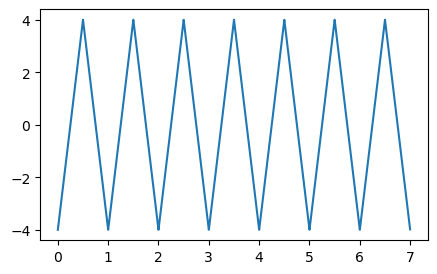

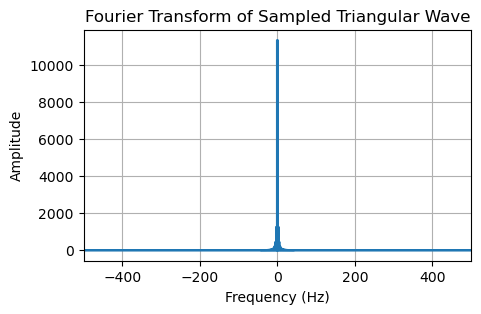

In [10]:
fs = 1000
T = 7     

freq=1
amp=4

t = np.linspace(0, T, int(fs * T), endpoint=False)
triag = amp *sawtooth(2 * np.pi * freq * t,width=0.5)

triag_fft = np.fft.fft(triag)
fft_freq = np.fft.fftfreq(len(triag), 1/fs)

plt.figure(figsize=(5, 3))
plt.plot(t,triag)
plt.show()
plt.figure(figsize=(5, 3))
plt.plot(fft_freq, np.abs(triag_fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Sampled Triangular Wave')
plt.grid(True)
plt.xlim(-500,500)
plt.show()

5


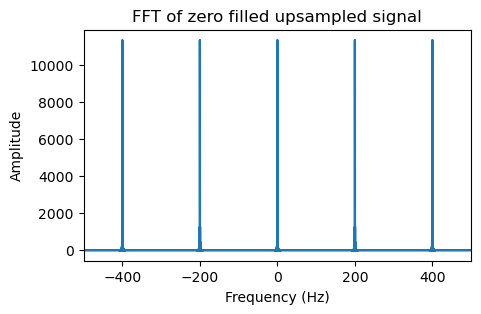

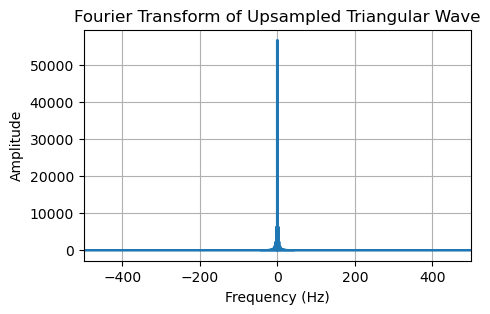

In [7]:

upsample_factor = eval(input("Enter the upsample factor:"))
print(upsample_factor)
zero_int=[]
for i in triag:
    zero_int.append(i)
    for j in range(upsample_factor-1):
        zero_int.append(0)
zero_int=np.array(zero_int)

upsampled_triangular_wave = resample(triag, len(triag)*upsample_factor)



upsampled_fft = np.fft.fft(upsampled_triangular_wave)
upsampled_fft_freq = np.fft.fftfreq(len(upsampled_triangular_wave), 1/(fs*upsample_factor))

zero_fft=np.fft.fft(zero_int)
zero_fft_freq=np.fft.fftfreq(len(zero_fft),1/fs)


plt.figure(figsize=(5, 3))
plt.plot(zero_fft_freq, np.abs(zero_fft))
plt.title("FFT of zero filled upsampled signal")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(-500,500)
plt.show()
plt.figure(figsize=(5, 3))
plt.plot(upsampled_fft_freq, np.abs(upsampled_fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(-500,500)

plt.title('Fourier Transform of Upsampled Triangular Wave')
plt.grid(True)
plt.show()



In [16]:

# # ds_factor = eval(input("Enter the downsample factor:"))
# for ds_factor in range(2,13):
#     ds_triag = triag[::ds_factor]
#     plt.plot(range(len(ds_triag)), ds_triag)
#     downsampled_fft = np.fft.fft(ds_triag)
#     ds_fft_freq = np.fft.fftfreq(len(ds_triag), 1/(fs/ds_factor))

#     plt.figure(figsize=(5, 3))
#     plt.plot(ds_fft_freq, np.abs(downsampled_fft))
#     plt.xlabel('Frequency (Hz)')
#     plt.ylabel('Amplitude')
#     plt.title('Fourier Transform of Downsampled Triangular Wave')
#     plt.grid(True)
#     plt.xlim(-10,10)
#     plt.savefig(f"{ds_factor}.png")
#     plt.show()


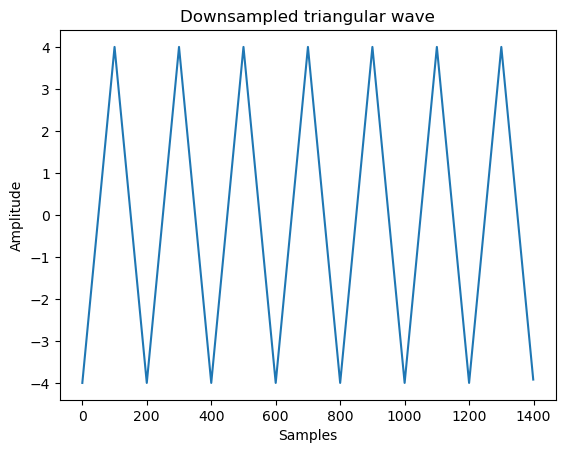

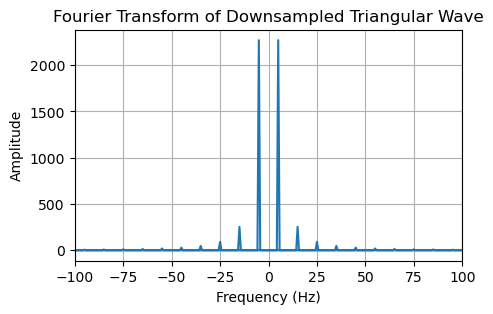

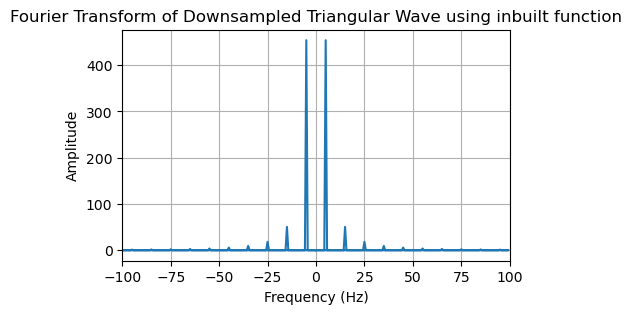

In [15]:

ds_factor = eval(input("Enter the downsample factor:"))

ds_triag = triag[::ds_factor]
plt.plot(range(len(ds_triag)), ds_triag)
plt.title("Downsampled triangular wave")
plt.xlabel("Samples")
plt.ylabel("Amplitude")

ds_fft = np.fft.fft(ds_triag)
ds_fft_freq = np.fft.fftfreq(len(ds_triag), 1/(fs))
plt.show()


plt.figure(figsize=(5, 3))
plt.plot(ds_fft_freq, np.abs(ds_fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Downsampled Triangular Wave')
plt.grid(True)
plt.xlim(-100,100)
plt.show()

ds_triag_inb=resample(ds_triag, int(len(ds_triag)/ds_factor))
ds_inb_fft=np.fft.fft(ds_triag_inb)
ds_inb_fft_freq=np.fft.fftfreq(len(ds_inb_fft),ds_factor/fs)

plt.figure(figsize=(5, 3))
plt.plot(ds_inb_fft_freq,np.abs(ds_inb_fft))
plt.xlabel('Frequency (Hz)')
plt.grid(True)
plt.xlim(-100,100)
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Downsampled Triangular Wave using inbuilt function')
plt.show()
